In [1]:
%matplotlib inline
from pycocotools.coco import COCO
from pycocoevalcap.eval import COCOEvalCap
import matplotlib.pyplot as plt
import skimage.io as io
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

import json
from json import encoder
encoder.FLOAT_REPR = lambda o: format(o, '.3f')

In [2]:
# set up file names and pathes
dataDir='../data'
dataType='val2014'
algName = 'fakecap'
annFile='%s/annotations/captions_%s.json'%(dataDir,dataType)
subtypes=['results', 'evalImgs', 'eval']
[resFile, evalImgsFile, evalFile]= \
['./results/captions_%s_%s_%s.json'%(dataType,algName,subtype) for subtype in subtypes]

In [3]:
# create coco object and cocoRes object
print annFile
coco = COCO(annFile)
cocoRes = coco.loadRes(resFile)

../data/annotations/captions_val2014.json
loading annotations into memory...
0:00:00.613923
creating index...
index created!
Loading and preparing results...     
DONE (t=0.03s)
creating index...
index created!


In [ ]:
print coco

In [6]:
# create cocoEval object by taking coco and cocoRes
cocoEval = COCOEvalCap(coco, cocoRes)

# evaluate on a subset of images by setting
# cocoEval.params['image_id'] = cocoRes.getImgIds()
# please remove this line when evaluating the full validation set
cocoEval.params['image_id'] = cocoRes.getImgIds()

# evaluate results
cocoEval.evaluate()

tokenization...
setting up scorers...
computing Bleu score...
{'reflen': 9855, 'guess': [9893, 8893, 7893, 6893], 'testlen': 9893, 'correct': [5732, 2510, 1043, 423]}
ratio: 1.00385591071
Bleu_1: 0.579
Bleu_2: 0.404
Bleu_3: 0.279
Bleu_4: 0.191
computing METEOR score...
METEOR: 0.195
computing Rouge score...
ROUGE_L: 0.396
computing CIDEr score...
CIDEr: 0.600


In [7]:
# print output evaluation scores
for metric, score in cocoEval.eval.items():
    print '%s: %.3f'%(metric, score)

CIDEr: 0.600
Bleu_4: 0.191
Bleu_3: 0.279
Bleu_2: 0.404
Bleu_1: 0.579
ROUGE_L: 0.396
METEOR: 0.195


ground truth captions
A train traveling down tracks next to lights.
A blue and silver train next to train station and trees.
A blue train is next to a sidewalk on the rails.
A passenger train pulls into a train station.
A train coming down the tracks arriving at a station.


generated caption (CIDEr score 1.0)
train traveling down a track in front of a road


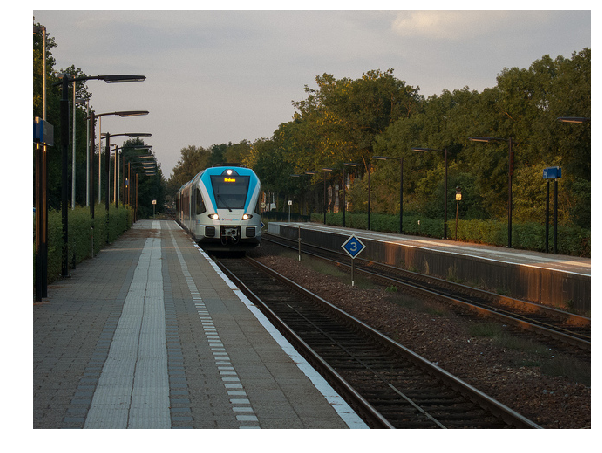

In [11]:
# demo how to use evalImgs to retrieve low score result
evals = [eva for eva in cocoEval.evalImgs if eva['CIDEr']<30]
print 'ground truth captions'
imgId = evals[0]['image_id']
annIds = coco.getAnnIds(imgIds=imgId)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

print '\n'
print 'generated caption (CIDEr score %0.1f)'%(evals[0]['CIDEr'])
annIds = cocoRes.getAnnIds(imgIds=imgId)
anns = cocoRes.loadAnns(annIds)
coco.showAnns(anns)

img = coco.loadImgs(imgId)[0]
I = io.imread('../data/val2014/%s'%img['file_name'])
plt.imshow(I)
plt.axis('off')
plt.show()

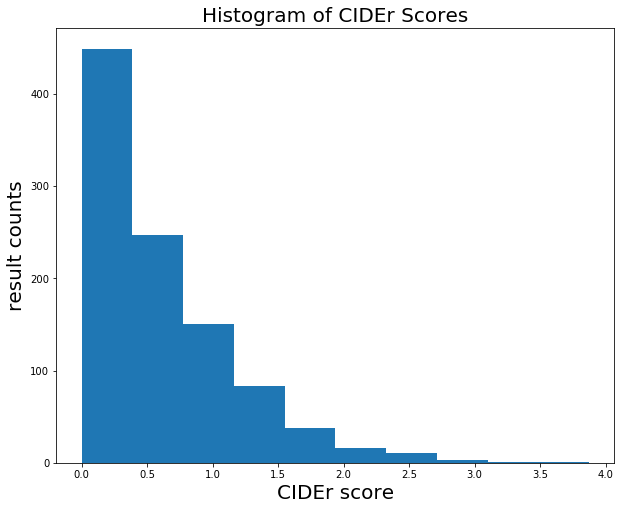

In [10]:
# plot score histogram
ciderScores = [eva['CIDEr'] for eva in cocoEval.evalImgs]
plt.hist(ciderScores)
plt.title('Histogram of CIDEr Scores', fontsize=20)
plt.xlabel('CIDEr score', fontsize=20)
plt.ylabel('result counts', fontsize=20)
plt.show()

In [8]:
# save evaluation results to ./results folder
json.dump(cocoEval.evalImgs, open(evalImgsFile, 'w'))
json.dump(cocoEval.eval,     open(evalFile, 'w'))